# Конфигурация плат
Получено с помощью:
```
cat /proc/cpuinfo
```
```
lscpu
```
```
getconf -a | grep CACHE
```

## Lichee 1
4 cores
```
cpu-freq        : 1.848Ghz
cpu-icache      : 64KB
cpu-dcache      : 64KB
cpu-l2cache     : 1MB
cpu-tlb         : 1024 4-ways
cpu-cacheline   : 64Bytes
cpu-vector      : 0.7.1
```

## Lichee 2


## Banana 1
8 cores
```
CPU(s) scaling MHz:  100%
  CPU max MHz:         1600.0000
  CPU min MHz:         614.4000
Caches (sum of all):
  L1d:                 256 KiB (8 instances)
  L1i:                 256 KiB (8 instances)
  L2:                  1 MiB (2 instances)
```
```
LEVEL1_ICACHE_SIZE                 32768
LEVEL1_ICACHE_ASSOC                4
LEVEL1_ICACHE_LINESIZE             64
LEVEL1_DCACHE_SIZE                 32768
LEVEL1_DCACHE_ASSOC                4
LEVEL1_DCACHE_LINESIZE             64
LEVEL2_CACHE_SIZE                  524288
LEVEL2_CACHE_ASSOC                 16
LEVEL2_CACHE_LINESIZE              64
LEVEL3_CACHE_SIZE                  0
LEVEL3_CACHE_ASSOC                 0
LEVEL3_CACHE_LINESIZE              0
LEVEL4_CACHE_SIZE                  0
LEVEL4_CACHE_ASSOC                 0
LEVEL4_CACHE_LINESIZE              0
```



# Анализируемый алгоритм
Функция пирамидальной сортировки
```
void heap_sort(int arr[], int n) {
  for (int i = n / 2 - 1; i >= 0; i--) heapify(arr, n, i);

  for (int i = n - 1; i >= 0; i--) {
    int temp = arr[0];
    arr[0] = arr[i];
    arr[i] = temp;

    heapify(arr, i, 0);
  }
}
```
Функция восстановления кучи
```
void heapify(int arr[], int n, int i) {
  int largest = i;
  int left = 2 * i + 1;
  int right = 2 * i + 2;

  if (left < n && arr[left] > arr[largest]) largest = left;

  if (right < n && arr[right] > arr[largest]) largest = right;

  if (largest != i) {
    int temp = arr[i];
    arr[i] = arr[largest];
    arr[largest] = temp;

    heapify(arr, n, largest);
  }
}
```


Горячая инструкция - сравнение

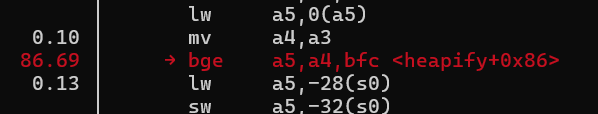

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io
uploaded = files.upload()

Saving banana_task_clock.txt to banana_task_clock.txt
Saving lichee_task_clock.txt to lichee_task_clock.txt


# Сравнение времени исполнения для разного заполнения массива


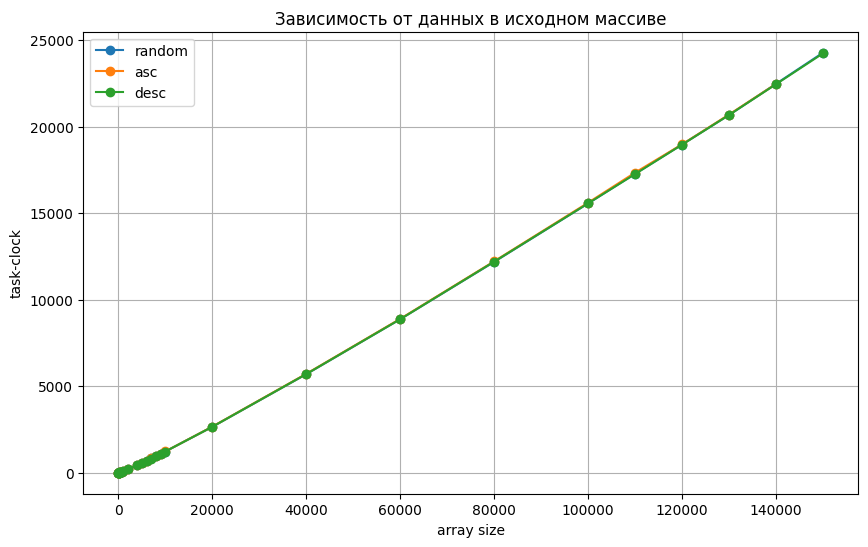

In [61]:
df_random = pd.read_csv(io.BytesIO(uploaded['random.txt']))
df_asc = pd.read_csv(io.BytesIO(uploaded['asc.txt']))
df_desc = pd.read_csv(io.BytesIO(uploaded['desc.txt']))
plt.figure(figsize=(10, 6))

# Построение каждой серии
plt.plot(df_random['array_size'], df_random['task-clock'], label='random', marker='o')
plt.plot(df_asc['array_size'], df_asc['task-clock'], label='asc', marker='o')
plt.plot(df_desc['array_size'], df_desc['task-clock'], label='desc', marker='o')

# Настройка графика
plt.title('Зависимость от данных в исходном массиве')
plt.xlabel('array size')
plt.ylabel('task-clock')
plt.legend()
plt.grid()

# Показать график
plt.show()

Результат:
Время сортировки не зависит от сортировки начального массива. Это связано с тем, что элементы исходного массива добавляются в кучу. Куча формируется на основе критериев, что максимальный элемент находится в корне дерева, и для каждого узла дерева его потомки должны быть не больше его самого.

# Сравнение времени выполнения на разных платах

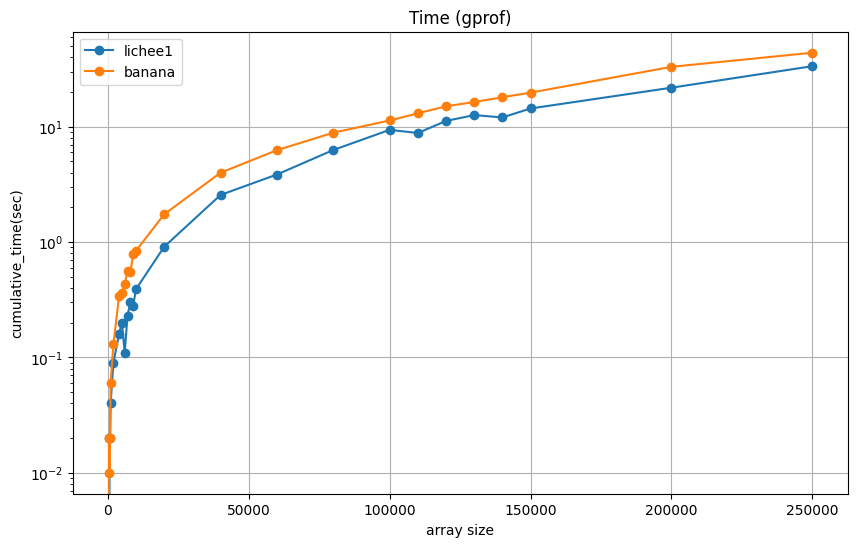

In [69]:
df_lichee1 = pd.read_csv(io.BytesIO(uploaded['lichee_gprof.txt']))
df_banana = pd.read_csv(io.BytesIO(uploaded['banana_gprof.txt']))
plt.figure(figsize=(10, 6))

# Построение каждой серии
plt.plot(df_lichee1['array_size'], df_lichee1['cumulative_time(sec)'], label='lichee1', marker='o')
plt.plot(df_banana['array_size'], df_banana['cumulative_time(sec)'], label='banana', marker='o')

# Настройка графика
plt.title('Time (gprof)')
plt.xlabel('array size')
plt.ylabel('cumulative_time(sec)')
plt.yscale('log')
plt.legend()
plt.grid()

# Показать график
plt.show()

Вывод: Время исполнения функции heap_sort и дочерних функций на плате Lichee 1 меньше, что связано с бОльшим размером кэша.

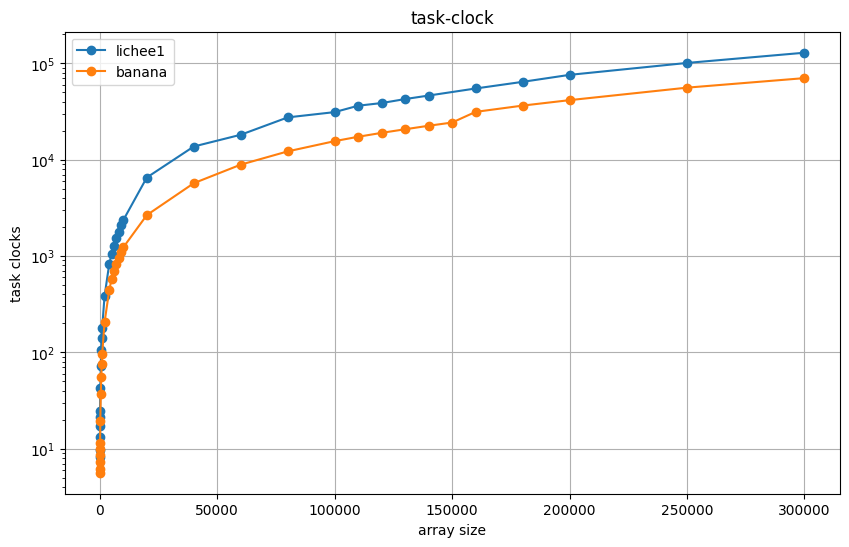

In [57]:
df_lichee1 = pd.read_csv(io.BytesIO(uploaded['lichee1.txt']))
df_banana = pd.read_csv(io.BytesIO(uploaded['banana.txt']))
plt.figure(figsize=(10, 6))

# Построение каждой серии
plt.plot(df_lichee1['array_size'], df_lichee1['task-clock'], label='lichee1', marker='o')
plt.plot(df_banana['array_size'], df_banana['task-clock'], label='banana', marker='o')

# Настройка графика
plt.title('task-clock')
plt.xlabel('array size')
plt.ylabel('task clocks')
plt.yscale('log')
plt.legend()
plt.grid()

# Показать график
plt.show()

Результат:
Время выполнения на Lichee1 больше, чем на Banana. Это связано с тем, что perf stat замеряет время работы всей программы, а не отдельной функции, что вносит большую погрешность.

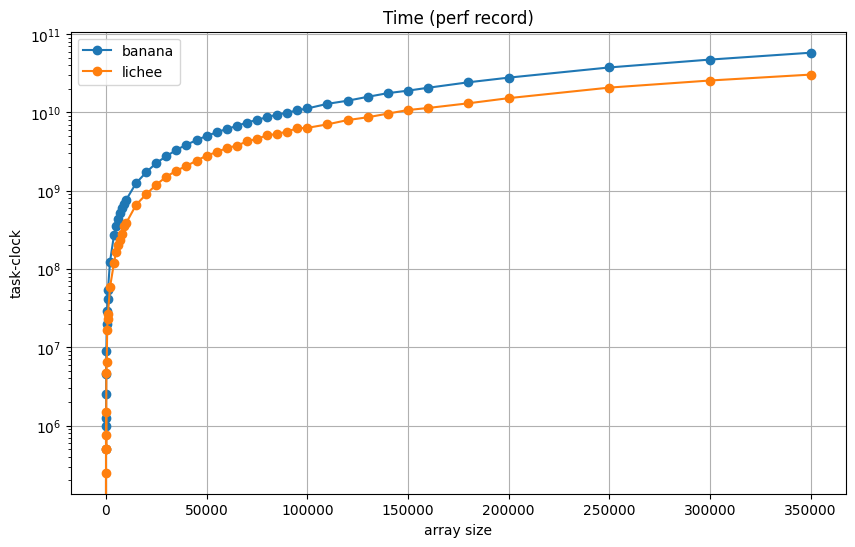

In [9]:
df_banana = pd.read_csv(io.BytesIO(uploaded['banana_task_clock.txt']))
df_lichee = pd.read_csv(io.BytesIO(uploaded['lichee_task_clock.txt']))
plt.figure(figsize=(10, 6))

# Построение каждой серии
plt.plot(df_banana['array_size'], df_banana['events_count'], label='banana', marker='o')
plt.plot(df_lichee['array_size'], df_lichee['events_count'], label='lichee', marker='o')

# Настройка графика
plt.title('Time (perf record)')
plt.xlabel('array size')
plt.ylabel('task-clock')
plt.yscale('log')
plt.legend()
plt.grid()

# Показать график
plt.show()

Вывод: при использовании perf record (подсчет количества task-clocks как total*(heapify_percent+heap_sort_percent)/100) графики соответствуют графикам gprof и показывают достоверные результаты о работе только функций сортировки.

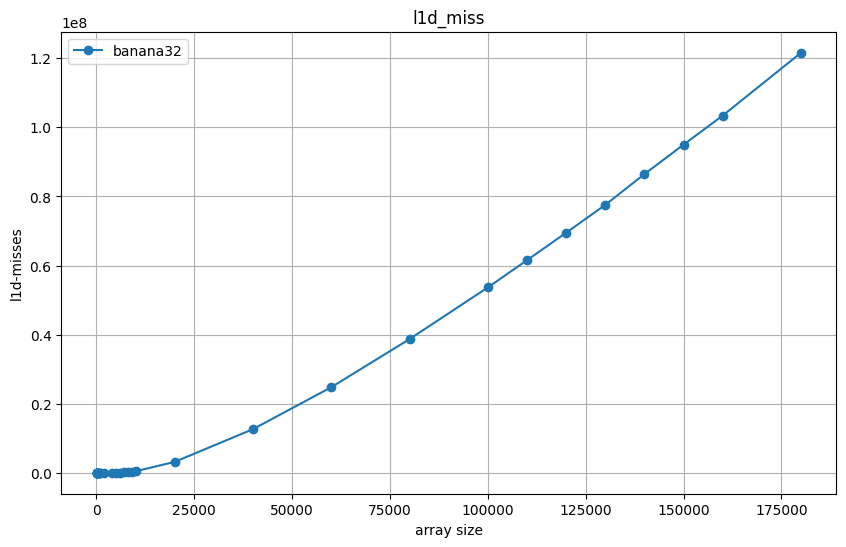

In [64]:
df_banana_int_32 = pd.read_csv(io.BytesIO(uploaded['banana32.txt']))
plt.figure(figsize=(10, 6))

# Построение каждой серии
plt.plot(df_banana_int_32['array_size'], df_banana_int_32['l1d_miss'], label='banana32', marker='o')

# Настройка графика
plt.title('l1d_miss')
plt.xlabel('array size')
plt.ylabel('l1d-misses')
plt.legend()
plt.grid()

# Показать график
plt.show()

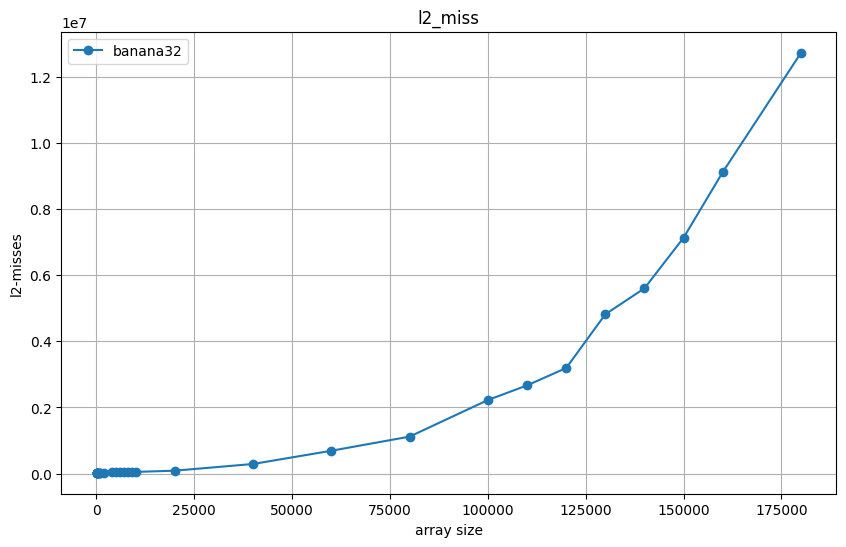

In [63]:
df_banana_int_32 = pd.read_csv(io.BytesIO(uploaded['banana32.txt']))
plt.figure(figsize=(10, 6))

# Построение каждой серии
plt.plot(df_banana_int_32['array_size'], df_banana_int_32['l2_miss'], label='banana32', marker='o')

# Настройка графика
plt.title('l2_miss')
plt.xlabel('array size')
plt.ylabel('l2-misses')
plt.legend()
plt.grid()

# Показать график
plt.show()

Количество кэш-промахов растет монотонно. Размер кэша L1 и L2 по графикам определить невозможно, что связано с непоследовательным обходом памяти.